WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[-0.02875094 -0.03485054 -0.04502454 -0.02481322]
1.0
[-0.02944795  0.16088721 -0.04552081 -0.33135504]
1.0
[-0.02623021  0.35662656 -0.05214791 -0.63803842]
1.0
[-0.01909768  0.55243541 -0.06490867 -0.94667695]
1.0
[-0.00804897  0.7483686  -0.08384221 -1.2590276 ]
1.0
[ 0.0069184   0.94445721 -0.10902277 -1.57674805]
1.0
[ 0.02580755  0.7507903  -0.14055773 -1.31996165]
1.0
[ 0.04082335  0.94738116 -0.16695696 -1.6531278 ]
1.0
[ 0.05977098  0.75455594 -0.20001952 -1.41676944]
1.0



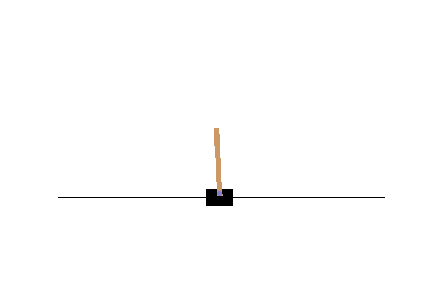
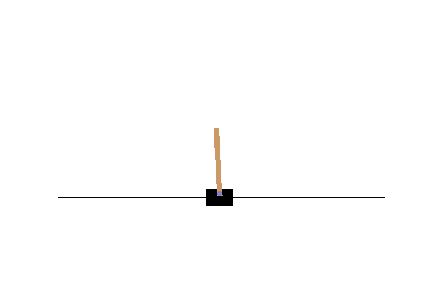
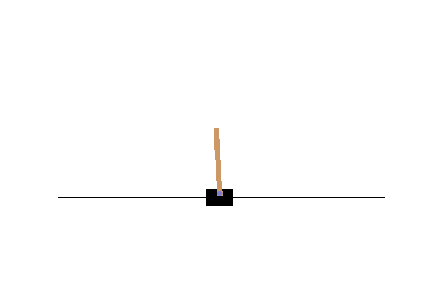
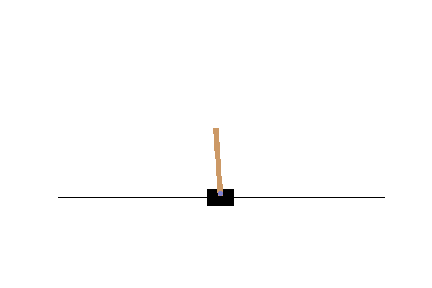
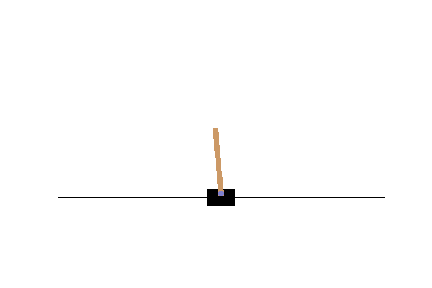
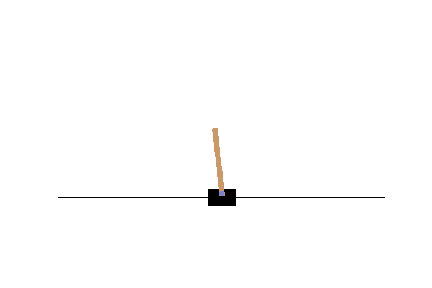
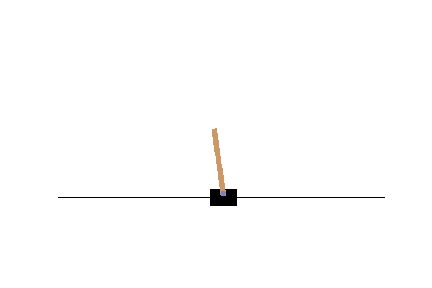
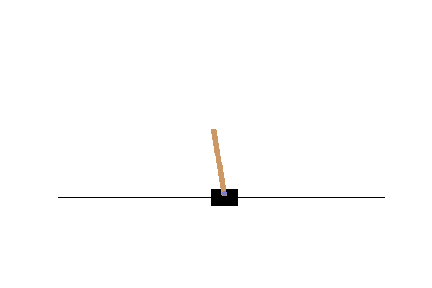
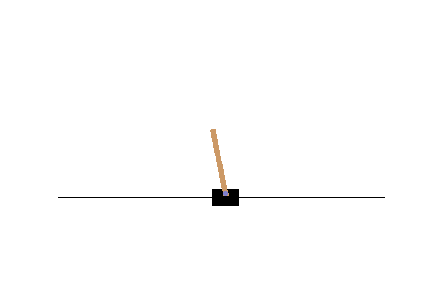

In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display


def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=100)
    display(display_animation(anim, default_mode='loop'))


env = gym.make('CartPole-v0')

# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    
    print(observation)
    
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    
    print(reward)
    
    if done:
        break
env.close()
display_frames_as_gif(frames)
